# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


the equation:/ny= 5x+-72
0.8614333619446506


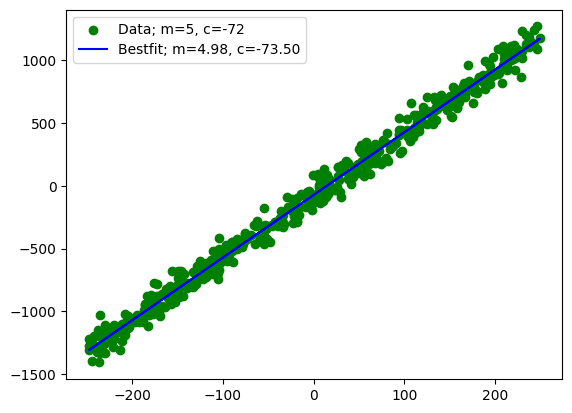

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import numpy as np 
import matplotlib.pyplot as plt
m = np.random.randint(1, 10)
c = np.random.randint(-100, 100)
print(f"the equation:/ny= {m}x+{c}")
x = np.random.rand(500)
x *= 500 
x -= 250
noise = np.random.randn(500) * np.random.randint(10*m, 30*m)
#I changed the noise strength until the disperssion was large enough
y = m*x + noise + c

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=37)

model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)

y_pred = model.predict(x_test.reshape(-1, 1))
train_pred = model.predict(x_train.reshape(-1, 1))
pred_line = model.coef_ * x + model.intercept_ 

print(mse(y_pred, y_test)/ mse(y_train, train_pred))

if (mse(y_pred, y_test)/ mse(y_train, train_pred) > 2):
    print("The model is overfitting")

data_label = f"Data; m={m}, c={c}"
plt.scatter(x=x, y=y, color='green', label = data_label)
line_label = f"Bestfit; m={model.coef_[0]:.2f}, c={model.intercept_:.2f}"
plt.plot(x, pred_line, color='blue', label=line_label)
plt.legend()
plt.show()


# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [2]:
from sklearn.metrics import r2_score
coefficients = np.random.randint(-100, 100, size=(3))
# coefficients = [a1, a2, c]
print(coefficients)
x = np.random.rand(500, 2)*500 - 250
noise = np.random.rand(500, 2) * 1.5
x_with_noise = x+noise
y = coefficients[0] * x_with_noise[:,0] + x_with_noise[:,1]*coefficients[1] + coefficients[2]
x_train = x[0:400,:]
x_test = x[400:, :]
y_train =y[0:400]
y_test = y[400:]

model = LinearRegression()

model.fit(x_train, y_train)
slopes = model.coef_
intercept = model.intercept_

output = np.concat((slopes, np.array([intercept])))
print(output)


def mae(x: np.ndarray, x_dash: np.ndarray):
    absolute_errors = np.abs(x - x_dash) 
    return np.mean(absolute_errors)

x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))
x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))

y_pred_train = (x_train*output).sum(axis=1)
y_pred_test = (x_test*output).sum(axis=1)
print(mse(y_pred_test, y_test)/ mse(y_pred_train, y_train))
print(mae(y_pred_test, y_test)/ mae(y_pred_train, y_train))
print(r2_score(y_pred_test, y_pred_test)/ r2_score(y_pred_train, y_train))
#if any of the above ratios is too big then the model is overfitting
#we don't realy have a baseline to measure underfitting

[ 0 22 16]
[-6.86563771e-03  2.20040076e+01  3.20919549e+01]
1.0637569116049503
1.0062278982080286
1.0000087351475984


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [3]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

/home/hatem/.virtualenvs/depi/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/hatem/.cache/kagglehub/datasets/rohitgrewal/airlines-flights-data/versions/1


In [4]:
os.listdir(path)

['airlines_flights_data.csv']

In [5]:
full_path = os.path.join(path,os.listdir(path)[0])

In [79]:
import pandas as pd
df = pd.read_csv(full_path)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [65]:
df.isna().sum(axis=0)

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [66]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<Axes: xlabel='count', ylabel='airline'>

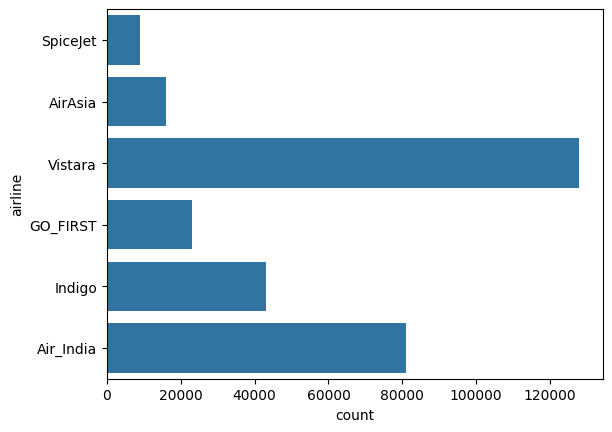

In [ ]:
import seaborn as sns
sns.countplot(df['airline'].to_numpy())

<Axes: xlabel='count'>

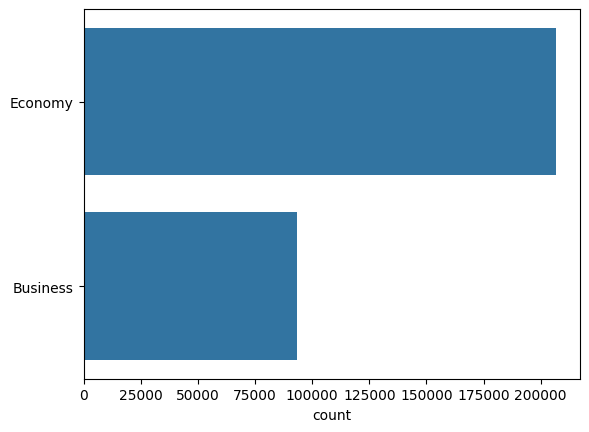

In [73]:

sns.countplot(df['class'].to_numpy())


<Axes: >

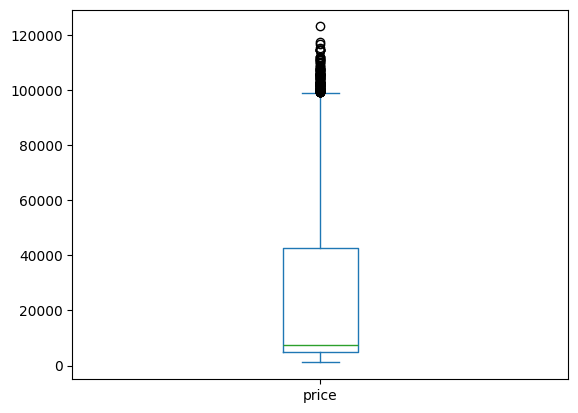

In [80]:
df['price'].plot(kind='box')

<Axes: xlabel='airline', ylabel='price'>

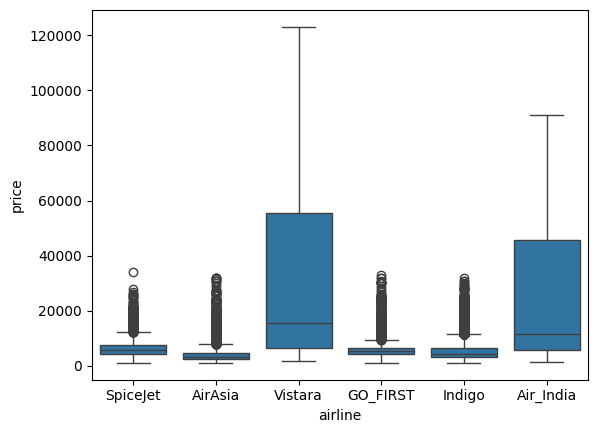

In [87]:
sns.boxplot(data=df, x='airline', y='price')


<Axes: xlabel='class', ylabel='price'>

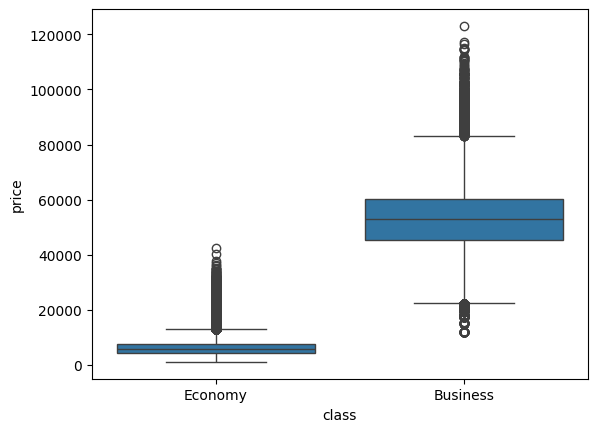

In [88]:
sns.boxplot(data=df, x='class', y='price')


<Axes: xlabel='duration', ylabel='price'>

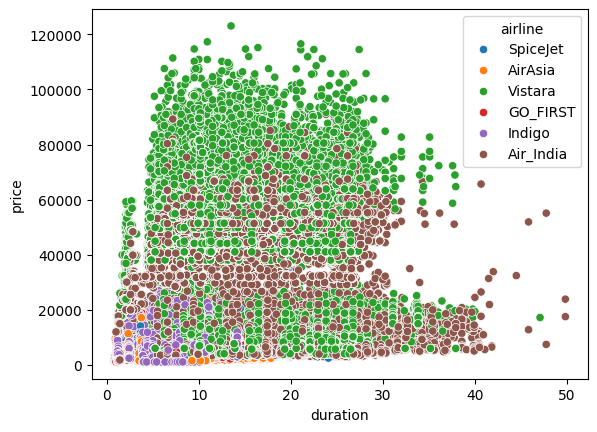

In [90]:
sns.scatterplot(data=df, x='duration', y='price', hue='airline')

<Axes: xlabel='duration', ylabel='price'>

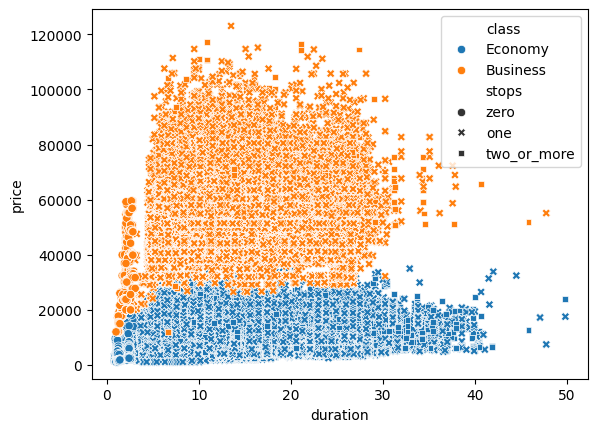

In [93]:
sns.scatterplot(data=df, x='duration', y='price', hue='class', style='stops')

<Axes: xlabel='source_city', ylabel='destination_city'>

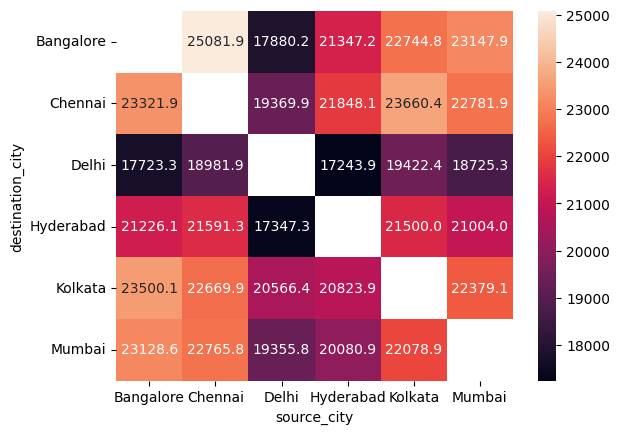

In [95]:
pivot_table = df.groupby(['destination_city', 'source_city'])['price'].mean().unstack()

sns.heatmap(pivot_table, annot=True, fmt='.1f')

In [ ]:
df.drop('index', axis=1, inplace=True)


<Axes: >

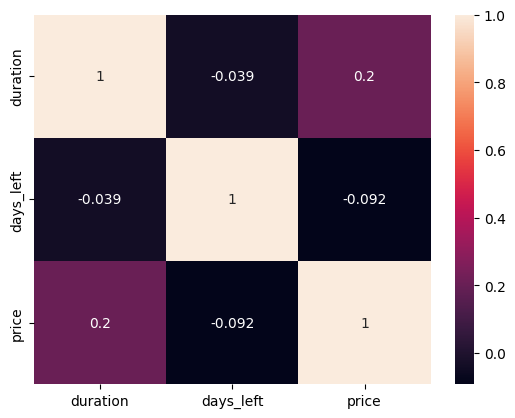

In [98]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# ohc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Return dense array
# oc = OrdinalEncoder(categories=[['Economy', 'Business']])


# ohc_columns = ['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'stops']
# ohc_result = ohc.fit_transform(df[ohc_columns])
# ohc_feature_names = ohc.get_feature_names_out(ohc_columns)

# ohc_df = pd.DataFrame(ohc_result, columns=ohc_feature_names, index=df.index)
# df['class'] = oc.fit_transform(df[['class']]).ravel()  

# df = pd.concat([
#     df.drop(columns=ohc_columns),
#     ohc_df
# ], axis=1)

ValueError: could not convert string to float: 'Economy'

while we should use the above cell it produces a very large dataframe causing my kernel to crash, so i will use ordinal encoding for everything to save memory

In [74]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

oc = OrdinalEncoder()

encoded_columns = ['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class', 'stops']
df[encoded_columns] = oc.fit_transform(df[encoded_columns])

In [75]:

df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df[list(df.columns)] = ss.fit_transform(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  float64
 1   airline           300153 non-null  float64
 2   flight            300153 non-null  float64
 3   source_city       300153 non-null  float64
 4   departure_time    300153 non-null  float64
 5   stops             300153 non-null  float64
 6   arrival_time      300153 non-null  float64
 7   destination_city  300153 non-null  float64
 8   class             300153 non-null  float64
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  float64
 11  price             300153 non-null  float64
dtypes: float64(12)
memory usage: 27.5 MB


In [78]:
model = LinearRegression()

y = df['price']
x = df.drop('price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size=0.8, random_state=42)

model.fit(x_train, y_train)
model.fit(x_train, y_train)
slopes = model.coef_
intercept = model.intercept_

output = np.concat((slopes, np.array([intercept])))
print(output)


def mae(x: np.ndarray, x_dash: np.ndarray):
    absolute_errors = np.abs(x - x_dash) 
    return np.mean(absolute_errors)

x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))
x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))

y_pred_train = (x_train*output).sum(axis=1)
y_pred_test = (x_test*output).sum(axis=1)
print(mse(y_pred_test, y_test)/ mse(y_pred_train, y_train))
print(mae(y_pred_test, y_test)/ mae(y_pred_train, y_train))
print(r2_score(y_pred_test, y_pred_test)/ r2_score(y_pred_train, y_train))



[ 7.39813863e-02  4.77250264e-03  8.05224116e-03  2.68568975e-03
 -9.62852266e-02  1.41660656e-02  9.40603172e-03 -9.08358092e-01
  2.84530786e-02 -7.84750885e-02  1.43213705e-04]
1.0013315532759768
0.9952091307388334
1.1178425016431153


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
